### Probly - Evidential Regression Tutorial

The `probly.transformation.evidential.regression` module transforms standard regression models into uncertainty-aware ones.

Simplified: In standard regression, a neural network predicts **a single number**, like a temperature, price, or position. But in real life, predictions are often uncertain. Sometimes the model *doesn't know* because of noise or missing data. 

This is where evidential regression comes into play. Instead of giving just one prediction like a normal regression model,  Evidential Regression can also tell us **how certain** the model is about its prediction.  
This comes in handy when your data is noisy or incomplete.

In this tutorial, we will:
1. Build a small neural network for a simple regression task  
2. Turn it into an **Evidential Model** that predicts both a value *and* its uncertainty  
3. Generate and visualize some test data  
4. See how uncertainty looks in the model’s predictions  
5. Try it yourself with a small exercise at the end  

## 1. Setup

Let’s import the libraries we need:
- **torch** → for building neural networks  
- **matplotlib** → for plotting  
- **probly.evidential_regression** → to turn a normal model into an uncertainty-aware one

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

from probly.transformation.evidential.regression.common import evidential_regression

## 2. Build a simple regression model

Here we make a small neural network that takes one input and predicts one output.  
Right now, it’s just a normal regression model — no uncertainty yet.

In [2]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
)

print("Base model:")
print(model)

Base model:
Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=1, bias=True)
)


## 3. Turn it into an Evidential Model

With one line of code, Probly replaces the last layer with a special **Evidential layer** that predicts 4 values instead of 1.  
These values represent both the prediction and its uncertainty.

In [3]:
evidential_model = evidential_regression(model)

print("\nEvidential model:")
print(evidential_model)


Evidential model:
Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): NormalInverseGammaLinear()
)


## 4. Synthetic Data

We’ll generate a simple sine curve with a little noise so the model has something to learn.

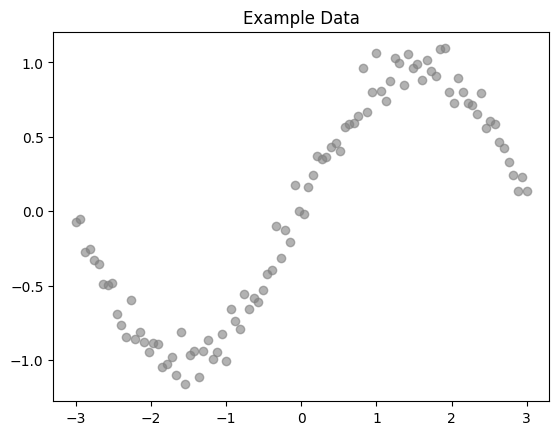

In [4]:
x = torch.linspace(-3, 3, 100).unsqueeze(-1)
y = torch.sin(x) + 0.1 * torch.randn_like(x)

plt.scatter(x, y, color="gray", alpha=0.6)
plt.title("Example Data")
plt.show()

## 5. Run the model

Let’s see what the model gives us when we pass the input `x`.  
It should output multiple values, not just one. 

In [5]:
with torch.no_grad():
    out = evidential_model(x)

print("Model output:")
print(out)

Model output:
{'gamma': tensor([[ 0.3857],
        [ 0.3710],
        [ 0.3564],
        [ 0.3417],
        [ 0.3271],
        [ 0.3124],
        [ 0.2978],
        [ 0.2831],
        [ 0.2685],
        [ 0.2538],
        [ 0.2392],
        [ 0.2245],
        [ 0.2099],
        [ 0.1952],
        [ 0.1806],
        [ 0.1681],
        [ 0.1564],
        [ 0.1446],
        [ 0.1329],
        [ 0.1211],
        [ 0.1094],
        [ 0.0976],
        [ 0.0859],
        [ 0.0741],
        [ 0.0611],
        [ 0.0477],
        [ 0.0334],
        [ 0.0188],
        [ 0.0023],
        [-0.0146],
        [-0.0310],
        [-0.0464],
        [-0.0643],
        [-0.0869],
        [-0.1060],
        [-0.1185],
        [-0.1267],
        [-0.1348],
        [-0.1419],
        [-0.1474],
        [-0.1444],
        [-0.1414],
        [-0.1384],
        [-0.1355],
        [-0.1321],
        [-0.1281],
        [-0.1241],
        [-0.1200],
        [-0.1160],
        [-0.1109],
        [-0.1009],
       

## 6. Check the uncertainty

Some models return 4 outputs:  
- `mu` (mean) → main prediction  
- `v`, `alpha`, `beta` → uncertainty parameters

We can use these to estimate how uncertain the model is.

In [6]:
import matplotlib.pyplot as plt
import torch


def compute_uncertainty(
    mu: torch.Tensor,
    v: torch.Tensor,
    alpha: torch.Tensor,
    beta: torch.Tensor,
) -> tuple[torch.Tensor, torch.Tensor]:
    """Compute predictive mean and variance for evidential regression."""
    var = beta / (v * (alpha - 1).clamp(min=1e-3))
    return mu, var


try:
    mu, v, alpha, beta = out
    mu, var = compute_uncertainty(mu, v, alpha, beta)

    plt.plot(x, mu, color="blue", label="Predicted mean")
    plt.fill_between(
        x.squeeze(),
        (mu - var.sqrt()).squeeze(),
        (mu + var.sqrt()).squeeze(),
        color="blue",
        alpha=0.2,
        label="Uncertainty",
    )
    plt.scatter(x, y, color="gray", alpha=0.5, label="Data")
    plt.legend()
    plt.title("Predictions and Uncertainty")
    plt.show()

except (TypeError, ValueError) as e:
    print("This model output type doesn't support uncertainty visualization:", e)

This model output type doesn't support uncertainty visualization: unsupported operand type(s) for -: 'str' and 'int'


## 7. Exercise 

Build a small model, make it evidential, and confirm that the last layer was replaced automatically.

### Task:
1. Create a simple model with a few `Linear` and `ReLU` layers  
2. Apply `evidential_regression()` to it  
3. Print the model and check what the **last layer** became  

In [7]:
# ruff: noqa: TD003

# TODO(@todo): 1. Build a simple model (hint: use nn.Sequential)
student_model = None  # your model here

# TODO(@todo): 2. Apply evidential regression
student_evidential = None  # call evidential_regression()

# TODO(@todo): 3. Print to inspect the transformation
print("Transformed model:")
print(student_evidential)

Transformed model:
None


## 8. Summary

You just learned how to:
- Build a simple regression model in PyTorch  
- Transform it into an uncertainty-aware version using **Probly**  
- Visualize what “uncertainty” looks like  

Evidential Regression lets a model say *“I’m not sure here”* —  
which is extremely valuable in real-world applications like self-driving, healthcare, or finance.